### 제2절. 이상치 확인 및 정제

#### 2. 이상치 확인

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


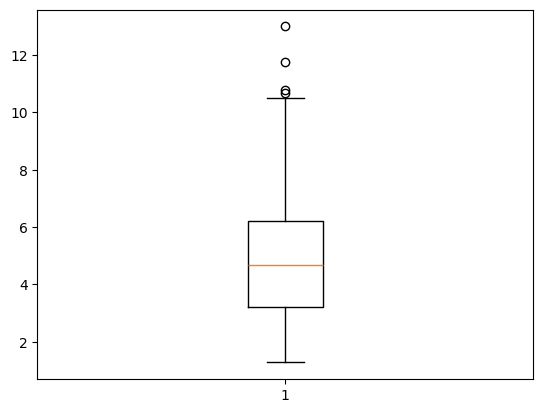

In [3]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [4]:
import numpy as np

def outliter_iqr(df, col) -> pd.DataFrame :
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_whisker = q1 - (iqr * 1.5)
    upper_whisker = q3 + (iqr * 1.5)
    outliers = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)]

    return outliers[[col]]

outliers = outliter_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


#### 3. 이상치 정제

In [5]:
drop_outliers = wine.drop(index=outliers.index)
print("original: ", wine.shape)
print("Drop outliers: ", drop_outliers.shape)

original:  (178, 14)
Drop outliers:  (174, 14)


In [6]:
# 이상치를 nan으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN으로 바뀐 이상치를 평균값으로 변경
wine.loc[wine['color_intensity'].isna()]
wine['color_intensity'].fillna(wine['color_intensity'].mean(), inplace=True)

In [7]:
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

### 제3절. 범주형 변수 처리

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_target = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = iris_target
iris['class'] = iris['class'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris_dummy = pd.get_dummies(iris, columns = ['class'], dtype=int)
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_setosa,class_versicolor,class_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 제4절. 데이터 분할

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_target = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = iris_target
iris['class'] = iris['class'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris.loc[:, :"petal width (cm)"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.loc[:, :"petal width (cm)"], 
                                                    iris['class'], 
                                                    test_size=0.2,
                                                    random_state=1004)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.loc[:, :"petal width (cm)"], 
                                                    iris['class'], 
                                                    test_size=0.2,
                                                    stratify=iris['class'],
                                                    random_state=1004)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [14]:
iris['class'].value_counts()

class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
Y_train.value_counts()

class
versicolor    40
virginica     40
setosa        40
Name: count, dtype: int64

### 제5절. 데이터 스케일링

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

## standard scaler
StdScaler = StandardScaler()
StdScaler.fit(X_train)

X_train_sc = StdScaler.transform(X_train)
X_test_sc = StdScaler.transform(X_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

## Min-Max Scaler
MmScaler = MinMaxScaler()
MmScaler.fit(X_train)

X_train_sc = MmScaler.transform(X_train)
X_test_sc = MmScaler.transform(X_test)

print("")
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


## MinAbsScaler
MaScaler = MinMaxScaler()
MaScaler.fit(X_train)

X_train_sc = MmScaler.transform(X_train)
X_test_sc = MmScaler.transform(X_test)

print("")
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


## Robust Scaler
RuScaler = RobustScaler()
RuScaler.fit(X_train)

X_train_sc = RuScaler(X_train)
X_test_sc = RuScaler(X_test)

print("")
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Train_scaled (%.2f), (%.2f), (%.2f), (%.2f)" % (X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.37), (3.04), (0.00), (1.00)
Train_scaled (-1.76), (2.48), (-0.01), (0.97)

		(min, max) (mean, std)
Train_scaled (0.00), (1.00), (0.46), (0.27)
Train_scaled (0.03), (1.06), (0.45), (0.26)

		(min, max) (mean, std)
Train_scaled (0.00), (1.00), (0.46), (0.27)
Train_scaled (0.03), (1.06), (0.45), (0.26)


TypeError: 'RobustScaler' object is not callable

In [17]:
# 원본 스케일로 변경하기
pd.DataFrame(X_train_sc).head()

,0,1,2,3
0,0.764706,0.458333,0.661017,0.583333
1,0.382353,0.333333,0.661017,0.791667
2,0.411765,0.416667,0.542373,0.458333
3,0.588235,0.583333,0.779661,0.958333
4,0.205882,0.583333,0.101695,0.125000


In [18]:
X_orig = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_orig).head()

,0,1,2,3
0,6.794118,3.240625,6.663559,2.1750
1,6.297059,3.175000,6.663559,2.4875
2,6.335294,3.218750,6.248305,1.9875
3,6.564706,3.306250,7.078814,2.7375
4,6.067647,3.306250,4.705932,1.4875


### 제6절. 차원축소

#### 2. 주성분분석

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_target = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = iris_target
iris['class'] = iris['class'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()


features = ['수치형변수1', '수치형변수2']
x = iris.drop('class', axis=1)

In [20]:
# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [21]:
# 주성분 추출
from sklearn.decomposition import PCA

pca = PCA(n_components=4)  # n_components: 생성할 주성분의 개수 
pca_fit = pca.fit(x)

print("고유 값: ", pca_fit.singular_values_)
print("분산 설명력: ", pca_fit.explained_variance_ratio_)


고유 값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


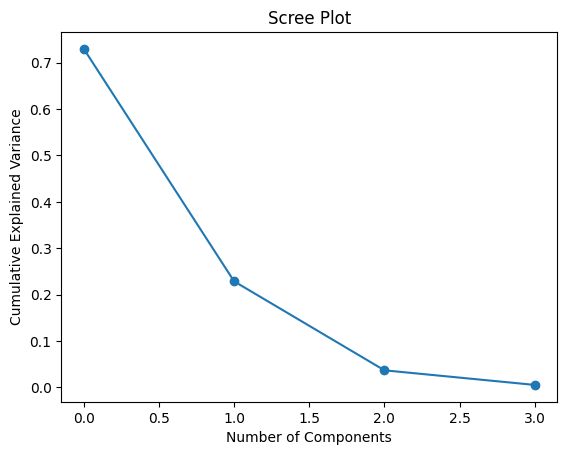

In [23]:
# Scree plot
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [28]:
# 새로운 데이터프레임 확인
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)  # 주성분 2개로 변환
principal_iris= pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


<Axes: title={'center': '2 component PCA'}, xlabel='pc1', ylabel='pc2'>

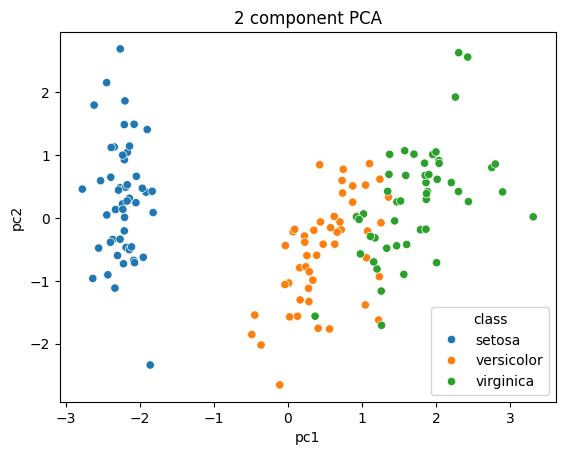

In [31]:
# 주성분 산포도 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(x='pc1', y='pc2', 
                hue = iris['class'], data = principal_iris)

### 제7절. 데이터 불균형 문제 처리

#### 1. 언더샘플링 (Under Sampling)

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)  # flip_y의 뜻?


In [33]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

NameError: name 'y' is not defined

In [32]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------------------- -------------------- 122.9/258.3 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
